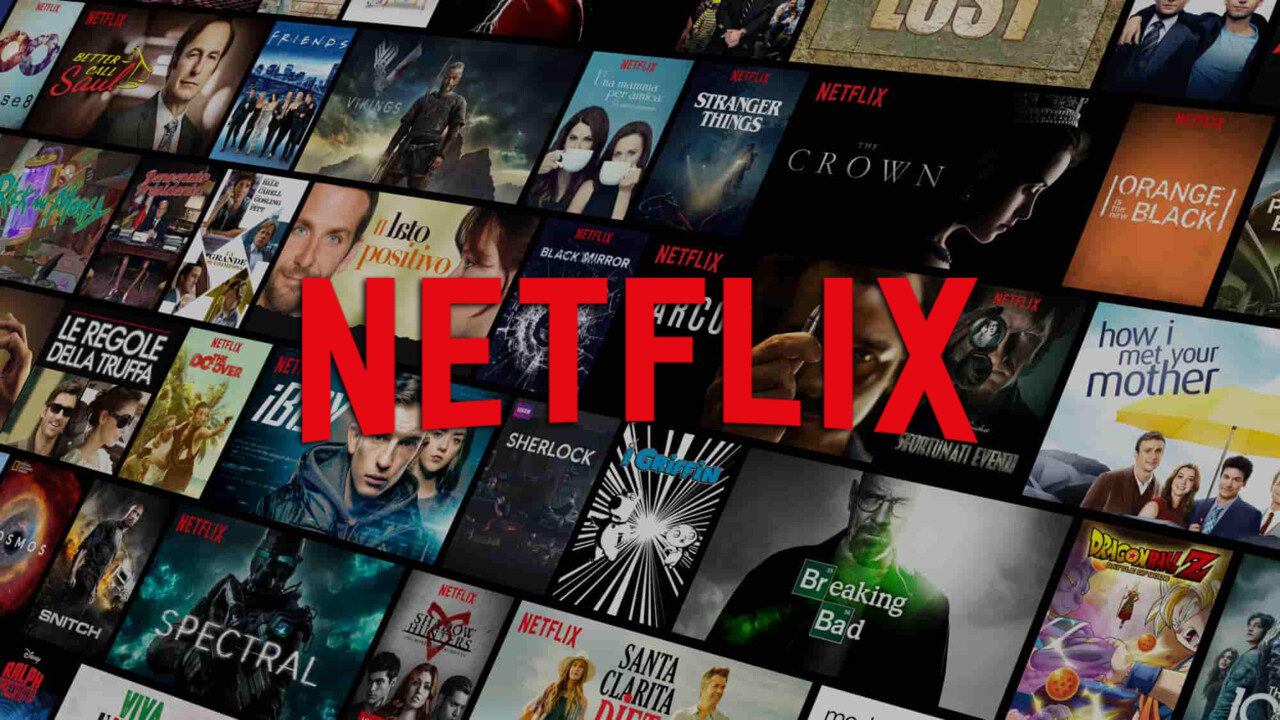

**NetFlix Recommendation System**

In [2]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
data = pd.read_csv('/content/8. Netflix Dataset.csv')

In [4]:
data.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


**Add an Index Column**

In [6]:
#For Comparing with other Movies , we use Index Column as ID of that perticualr row
# If we dont have Index column, then we need to create a column having S.O no. as ID(numeric)
# Add a column, name Index having Serial number values by using numpy
data['Index'] = np.arange(len(data))
data.head()
# we can also use shape i.e data['Index]=np.arange(data.shape[0])
# shape[0] is the number of rows in first column

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Index
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",3
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,4


**Solving Null Values**

In [7]:
data.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
Index              0
dtype: int64

In [11]:
null_features = ['Director','Cast','Country','Release_Date','Rating']
# These Columns have null values,now we make a function and call these features one by one and
# replace null values with null Strings
for features in null_features:
  data[features] = data[features].fillna('')

# data.features = data.features.fillna('')

In [12]:
data.isnull().sum()

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
Index           0
dtype: int64

**Feature Vectors**

In [15]:
# Combine all necessary features & then convert text data to feature vectors using TfidfVectorizer
combined_features = data.Title +' '+ data.Description +' '+ data.Type +' '+ data.Director +' '+ data.Cast
print(combined_features)

0       3% In a future where the elite inhabit an isla...
1       07:19 After a devastating earthquake hits Mexi...
2       23:59 When an army recruit is found dead, his ...
3       9 In a postapocalyptic world, rag-doll robots ...
4       21 A brilliant group of students become card-c...
                              ...                        
7784    Zozo When Lebanon's Civil War deprives Zozo of...
7785    Zubaan A scrappy but poor boy worms his way in...
7786    Zulu Man in Japan In this documentary, South A...
7787    Zumbo's Just Desserts Dessert wizard Adriano Z...
7788    ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS This d...
Length: 7789, dtype: object


In [20]:
feature_vectors = TfidfVectorizer().fit_transform(combined_features)
#print(feature_vectors)

**Cosine Similarity**

In [21]:
#Getting Similarity Score using Cosine Similarity
similarity = cosine_similarity(feature_vectors)
print(similarity)

[[1.         0.05752529 0.02191122 ... 0.01488743 0.02195019 0.02067693]
 [0.05752529 1.         0.00737035 ... 0.05329258 0.00158924 0.00581017]
 [0.02191122 0.00737035 1.         ... 0.00803351 0.00728952 0.01279415]
 ...
 [0.01488743 0.05329258 0.00803351 ... 1.         0.01464294 0.080673  ]
 [0.02195019 0.00158924 0.00728952 ... 0.01464294 1.         0.01590098]
 [0.02067693 0.00581017 0.01279415 ... 0.080673   0.01590098 1.        ]]


In [22]:
similarity.shape

(7789, 7789)

**Getting the Movie Name from the User**

In [24]:
movie_name = input('Enter your Favorite Movie Name: ')

Enter your Favorite Movie Name: Ip man


In [42]:
#creating a List of all the Movie/TV Shows name given in the Dataset
list_of_titles = data.Title.tolist()
#print(list_of_titles)

In [43]:
#Finding the close match of the movie name given by user
find_close_matches = difflib.get_close_matches(movie_name,list_of_titles)
print(find_close_matches)

['Ip Man', 'Ip Man 3', 'Ip Man 2']


In [44]:
#Top/Most Close Match
close_match = find_close_matches[0]
print(close_match)

Ip Man


**Getting a List of Similar Movies**

In [47]:
# Finding the Index of the Movie with Title
index_of_movie = data[data.Title == close_match]['Index'].values[0]
print(index_of_movie)

3047


In [53]:
# Getting a List of Similar Movies
similarity_score = list(enumerate(similarity[index_of_movie]))
#print(similarity_score)

In [52]:
len(similarity_score)

7789

In [55]:
# Sorting the movies based on their Similarity_score
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print(sorted_similar_movies[0])
# Most similar score

(3047, 1.0000000000000002)


**Print the names of Similar Movies/TV Shows based on Index**

In [58]:
print('Movies Suggested for you: \n')
i = 1
for movies in sorted_similar_movies:
  index = movies[0]
  title_from_index = data[data.Index == index]['Title'].values[0]
  if (i<30):
    print(i,'.',title_from_index)
    i+=1

Movies Suggested for you: 

1 . Ip Man
2 . Ip Man 2
3 . Ip Man 3
4 . Ip Man 4: The Finale
5 . Master Z: The Ip Man Legacy
6 . The Grandmaster
7 . Railroad Tigers
8 . Behind "The Cove": The Quiet Japanese Speak Out
9 . Dragon Tiger Gate
10 . Iceman
11 . The Twins Effect II
12 . 14 Blades
13 . Chasing the Dragon
14 . God of War
15 . Line Walker
16 . The Young Vagabond
17 . Look Out, Officer
18 . Three
19 . Man of Tai Chi
20 . Japanese Style Originator
21 . Casino Tycoon
22 . Rumble in the Bronx
23 . Weeds on Fire
24 . PILI Fantasy: War of Dragons
25 . The Defected
26 . King’s War
27 . Legend of the Naga Pearls
28 . My Schoolmate, the Barbarian
29 . Doubles Cause Troubles


**Only Main Codes**

In [59]:
movie_name = input('Enter your Favorite movie name: ')
list_of_all_titles = data.Title.tolist()
find_close_match = difflib.get_close_matches(movie_name,list_of_all_titles)
close_match = find_close_match[0]
index_of_the_movie = data[data.Title == close_match].Index.values[0]
similarity_score = list(enumerate(similarity[index_of_the_movie]))
sorted_similar_movies = sorted(similarity_score, key = lambda x: x[1], reverse = True)

print('Movies Sugeested \n')
i = 1
for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = data[data.Index == index].Title.values[0]
  if(i<30):
    print(i,'.',title_from_index)
    i+=1

Enter your Favorite movie name: peaky blinders
Movies Sugeested 

1 . Peaky Blinders
2 . Inception
3 . Rebellion
4 . Loaded
5 . The Frankenstein Chronicles
6 . Happy Valley
7 . Eddie Murphy: Raw
8 . Caught on Camera
9 . Giri / Haji
10 . Dead Set
11 . Kiss Me First
12 . Eddie Murphy: Delirious
13 . Trio and a Bed
14 . The Murder Detectives
15 . Father Brown
16 . Broadchurch
17 . DreamWorks Shrek's Swamp Stories
18 . Jonathan Strange & Mr Norrell
19 . London Spy
20 . Khan: No. 1 Crime Hunter
21 . The Great Train Robbery
22 . Ripper Street
23 . Apaches
24 . Cuckoo
25 . Transcendence
26 . Free Fire
27 . Thorne: Scaredy Cat
28 . I AM A KILLER: RELEASED
29 . Troy
